# COGS 108 - Bus Stop Accident Data Analysis Report

Link to video: https://drive.google.com/file/d/1BFoZ_PsWVbSOdJ-Dsp_hDO2uITdmB-z4/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ <b>X</b> ] <b>YES</b> - make available
* [  ] NO - keep private

# Overview

This data science project looks at the correlation between the use of public transportation and car accidents in metropolitan cities in the United States. We decided to focus our analysis on buses as they are the most consistent and standardized method of transportation in large U.S. city centers. We also took into consideration confounding variables such as weather conditions and population density in our analysis of accident concentrations.

# Names

- Shasta Subramanian
- Nadine Marcus
- Alexander Kourjanski
- Sean Bianes
- Seung Kang


<a id='research_question'></a>
# Research Question

How does the frequency of bus stops in major US cities affect corresponding car accident distributions, and what are the most influential outside factors (population density, weather patterns, and proximity to infrastructure)?

<a id='background'></a>

## Background & Prior Work


References (include links):
 1. There seems to be some amount of previous research done on this topic within the United States, but for the most part it is just articles stating that the increase in public transportation reduces the car accident mortality by 90%. The most in depth article that was possible to find is an article of the CNU journal that only discusses the fatal car crashes, and not the overall number of car accidents from 2016<sup>[lichtman]</sup>. Although this study does go into detail regarding the data, the study does not go into detail regarding car accidents that do not cause death, which will be included in our study. They found that for cities with more than 500,000 people, there was a correlation of -0.71 between fatal car accidents and the use of public transportation per capita.
 2. However, there was a study on the relationship between the frequency of night-bus transit and car accidents in major Israeli cities. Despite this being a study conducted outside the U.S., unlike the study above, data was collected for every accident that resulted in at least one injured individual. The research revealed that increase in night-bus usage decreased the frequency of accidents on Thursday and Saturday nights when traffic is greater than usual due to religious events and practices in Israel<sup>[steuteville]</sup>. The effect of Thursday and Saturday night buses on accident frequency involving people aged 15-29 was -0.0086 but with a p-value of less than 0.1. This decrease in accident rate was also 20.2% of the mean accident rate for the sample urban areas used in the study.

References:
- [lichtman]: Lichtman-Sadot, Shirlee. Ben-Gurion University of the Negev, https://in.bgu.ac.il/en/Pages/default.aspx
- [steuteville]: Steuteville, Robert. “Big Safety Benefits From Transit.” CNU, 31 May 2022, https://www.cnu.org/publicsquare/2016/09/14/study-big-safety-benefits-transit

# Hypothesis


We believe that with an increase of accessibility and use of the bus system (aka more bus stops), there is a decrease in the rate of the collisions in the area for metropolitan cities because there will be less individuals driving, leading to less cars on the road. That way, without as much congestion, the streets will be overall safer. We also want to consider the influence of other factors out of which we believe the population density and weather would have the greatest impact.

# Dataset(s)

<ol>
    <li><b>Name</b>: US Accidents (2016 - 2021)
    <ol>
      <li><b>Link</b>: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents</li>
      <li><b>Number of observations</b>: 2,845,342</li>
      <li><b>Description</b>: This dataset contains accident records in 49 states in the United States from 2016 to 2021 using traffic incident APIs. The information, including location, severity, weather conditions, and more, was captured by numerous transportation departments and agencies. </li>
    </ol>
  </li>
  <li><b>Name</b>: Population Density for U.S. Cities Statistics
    <ol>
      <li><b>Link</b>: https://www.governing.com/archive/population-density-land-area-cities-map.html </li>
      <li><b>Number of observations</b>: 1000+</li>
      <li><b>Description</b>: This dataset contains population density information for major US cities. In particular, it only includes records of cities with populations over 50,000. We will be focusing on the top 15 most populous cities in the US.</li>
    </ol>
  </li>
    <li><b>Webscraping</b>:  Used to find number of bus stops in the largest cities</li>
       
</ol>

Our primary dataset is the US Accidents set from Kaggle had over 2.8 million records, which was too large to use directly in Jupyter Notebooks. To resolve this, we removed some of the columns locally and then performed the remaining cleaning operations on the Datahub server. To incorporate the Population Density data, we manually inserted the cities relevant to the data we're collecting: the top 15 most populous cities in the US. Since population density is a confounding variable in answering our research question, we are looking to combine our datasets through the "City" column that was tidied to exclude the state in the name so it can have a matchable ID to other dataframes.

# Setup

In [76]:
## YOUR CODE HERE
%pip install opendatasets
%pip install -q kaggle

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd
import opendatasets as od
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup
import patsy
import statsmodels.api as sm

In [78]:
file = pd.read_csv('./us_accidents_smaller.csv')
file.head()

,Unnamed: 0,Start_Time,City,State,Temperature(F),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,Railway,Roundabout,Station,Stop
0,0,2016-02-08 00:37:08,Dublin,OH,42.1,0.00,Light Rain,False,False,False,False,False,False,False,False,False
1,1,2016-02-08 05:56:20,Dayton,OH,36.9,0.02,Light Rain,False,False,False,False,False,False,False,False,False
2,2,2016-02-08 06:15:39,Cincinnati,OH,36.0,0.02,Overcast,False,False,False,False,True,False,False,False,False
3,3,2016-02-08 06:51:45,Akron,OH,39.0,NaN,Overcast,False,False,False,False,False,False,False,False,False
4,4,2016-02-08 07:53:43,Cincinnati,OH,37.0,0.01,Light Rain,False,False,False,False,False,False,False,False,False


# Data Cleaning

The original US Accident data set consists of over 2.8 million records, covering 49 states in America. There are 47 columns storing a large variety of information spreading from accident location, severity, weather conditions, proximity to varying infrastructures, and more. We removed the columns that we did not need for our research locally before transferring the dataset to Jupyter Notebooks. For the purpose of our data science project, we only need a few select categories from the set listed below.

**Columns to Keep**: Date (Start Time), City, State, Temperature, Precipitation, Weather_Condition, Amenity, Bump, Crossing, Give_Way, Junction, Railway, Roundabout, Station, Stop
 
After reading in the semi-cleaned dataset, we removed all rows that had a null input and specifically kept the rows for the top 15 cities we decided to look at. Please refer to the Jupyter Notebook for more clarity on selection.

In [79]:
#print number of null rows
null_rows = len(file[file.isna().any(axis=1)])
print("Number of null rows:", null_rows, ", Data shape:", file.shape)

#drop all rows with null values
file = file.dropna(axis = 0)
print("Data shape after dropping nulls:", file.shape)

Number of null rows: 571269 , Data shape: (2845342, 16)
Data shape after dropping nulls: (2274073, 16)


<h4>Saving Particular Cities</h4>

In [80]:
cities = ['New York',"Los Angeles","Chicago","Houston","Phoenix","Philadelphia","San Antonio","San Diego","Dallas","San Jose","Austin","Jacksonville","San Francisco","Columbus","Indianapolis"]

file = file.loc[file['City'].isin(cities)]
file.head()

,Unnamed: 0,Start_Time,City,State,Temperature(F),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,Railway,Roundabout,Station,Stop
16,16,2016-02-08 19:47:42,Columbus,OH,34.0,0.07,Overcast,False,False,False,False,False,False,False,False,False
17,17,2016-02-08 19:47:42,Columbus,OH,34.0,0.07,Overcast,False,False,False,False,False,False,False,False,False
18,18,2016-02-08 20:13:22,Columbus,OH,33.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False
22,22,2016-02-09 05:54:01,Columbus,OH,25.0,0.02,Light Snow,False,False,False,False,False,False,False,False,False
46,46,2016-02-10 06:17:32,Columbus,OH,15.8,0.00,Light Snow,False,False,False,False,False,False,False,False,False


In [81]:
file.shape

(227111, 16)

<h4>Tracking Number of Accidents per City</h4>

In [82]:
accidents_byCity = {}
for c in cities:
    accidents = file['City'].value_counts()[c]
    accidents_byCity[c] = accidents
accidents_byCity

{'New York': 5438,
 'Los Angeles': 58092,
 'Chicago': 5067,
 'Houston': 29279,
 'Phoenix': 13287,
 'Philadelphia': 6453,
 'San Antonio': 5482,
 'San Diego': 22462,
 'Dallas': 34040,
 'San Jose': 6119,
 'Austin': 16290,
 'Jacksonville': 12592,
 'San Francisco': 5458,
 'Columbus': 2071,
 'Indianapolis': 4981}

Text(0, 0.5, 'Number of Accidents')

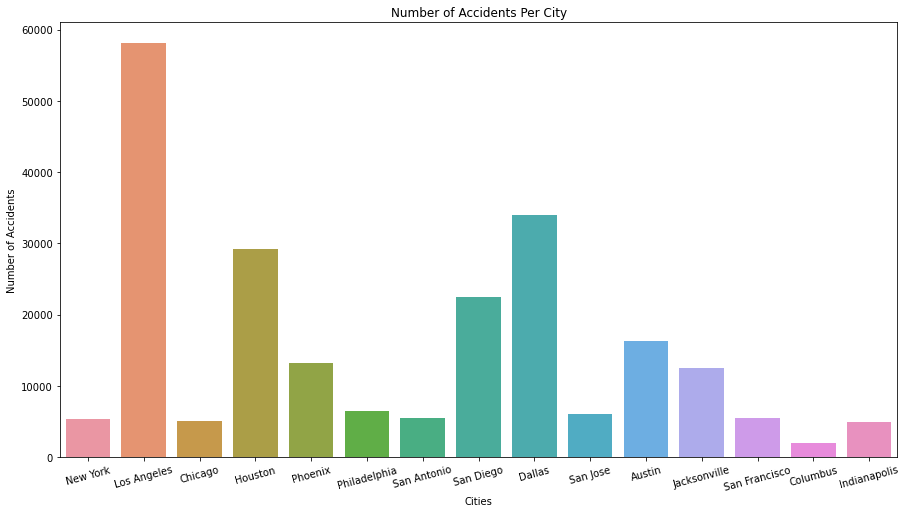

In [83]:
accidents = [val for key, val in accidents_byCity.items()]
f1,ax = plt.subplots(figsize =(15, 8))
sns.barplot(x=cities, y = accidents, ax=ax)
plt.xticks(rotation=15)
plt.title('Number of Accidents Per City')
plt.xlabel('Cities')
plt.ylabel('Number of Accidents')

<h4>Inputting Population Density Data</h4>
This dataset includes all US cities with a population of over 50,000 in 2016, ranked by the population size. The original dataframe included over 1000 observations, so we tidied our data to only include the cities relevant to the data we're collecting: the top 15 most populous cities in the US. The dataset originally had four columns, but to gather the necessary data, we only need to know the city and population density.

In [84]:
columns = ['City', 'Population Density (Persons/Square Mile)', 'Population', 'Land Area (Square Miles)']
pop_dens_df = pd.DataFrame([['New York, New York', 28211, 8537673, 303],
['Los Angeles, California', 8484, 3976322, 469],
['Chicago, Illinois', 11883, 2704958, 228],
['Houston, Texas', 38422, 2303482, 600],
['Phoenix, Arizona', 3126, 1615017, 517],
['Philadelphia, Pennsylvania', 11692, 1567872, 134],
['San Antonio, Texas', 3238, 1492510, 461],
['San Diego, California', 4326, 1406630, 325],
['Dallas, Texas', 3870, 1317929, 341],
['San Jose, California', 5808, 1025350, 177],
['Austin, Texas', 3182, 947890, 298],
['Jacksonville, Florida', 1179, 880619, 747],
['San Francisco, California', 18581, 870887, 47],
['Columbus, Ohio', 3960, 860090, 217],
['Indianapolis, Indiana', 2366, 855164, 361]], columns = columns)

pop_dens_df[['City', 'State']] = pop_dens_df.City.str.split(',', expand = True)
pop_dens_df = pop_dens_df.drop(['Land Area (Square Miles)', 'State'], axis = 1)
pop_dens_df.groupby('City').sum()

,Population Density (Persons/Square Mile),Population
City,,
Austin,3182,947890
Chicago,11883,2704958
Columbus,3960,860090
Dallas,3870,1317929
Houston,38422,2303482
Indianapolis,2366,855164
Jacksonville,1179,880619
Los Angeles,8484,3976322
New York,28211,8537673


Since population density is a confounding variable in answering our research question, we are looking to combine our datasets through the "City" column that was tidied to exclude the state in the name so it can have a matchable ID to other dataframes.

<h4>WEBSCRAPE: Inputting Bus Stop Count Data by City</h4>
For this dataframe, we had to use webscraping from different websites for each city in order to get the exact number of bus stops within each respective city. The City column will be used to combine this with the other datasets. We searched for these particular cities based on the top populations we found earlier to narrow down the size of the data we handled.

**Number of Bus Stops by City**
- 14000, [New York City]('https://www.ny.com/transportation/buses/ridebuses.html')
- 11824, [Los Angeles]('https://moovitapp.com/index/en/public_transit-lines-Los_Angeles_CA-302-1177#:~:text=METRO%20')
- 10768, [Chicago]('https://www.transitchicago.com/facts/')
- 8939, [Houston]('https://moovitapp.com/index/en/public_transit-lines-Houston_TX-744-8791#:~:text=The%20METRO%20has%20103%20Bus%20routes%20in%20Houston%20with%208939%20Bus%20stops')
- 4038, [Phoenix]('https://www.phoenix.gov/publictransit/rider-information/bus-stops-and-passenger-facilities#:~:text=Currently%20the%20City%20of,bus%20stops%20within%20city%20boundaries')
- 4512, [Philadelphia]('https://moovitapp.com/index/en/public_transit-lines-Philadelphia_PA-282-852280#:~:text=The%20NJ%20TRANSIT%20BUS%20has,Philadelphia%20with%204512%20Bus%20stops')
- 6015, [San Antonio]('https://moovitapp.com/index/en/public_transit-lines-San_Antonio_TX-1544-727002#:~:text=The%20VIA%20Metropolitan%20Transit%20has,Antonio%20with%206015%20Bus%20stops')
- 4191, [San Diego]('https://moovitapp.com/index/en/public_transit-lines-San_Diego_CA-582-8889#:~:text=The%20MTS%2DBus%20has%20104,Diego%20with%204191%20Bus%20stops')
- 6878, [Dallas]('https://www.dart.org/about/dartfacts.asp')
- 3201, [San Jose]('https://moovitapp.com/index/en/public_transit-lines-SF_Bay_Area_CA-22-224#:~:text=VTA%20')
- 2329, [Austin]('https://moovitapp.com/index/en/public_transit-lines-Austin_TX-583-855276#:~:text=The%20Capital%20Metro%2DBus%20has,Austin%20with%202329%20Bus%20stops')
- 2359, [Jacksonville]('https://moovitapp.com/index/en/public_transit-lines-Austin_TX-583-855276#:~:text=The%20Capital%20Metro%2DBus%20has,Austin%20with%202329%20Bus%20stops')
- 2964, [San Francisco]('https://www.bloomberg.com/news/articles/2021-08-03/how-better-bus-stops-can-boost-transit-ridership#:~:text=The%20San%20Francisco%20County%20Municipal,stops%20across%20the%20Bay%20Area')
- 2934, [Columbus]('https://moovitapp.com/index/en/public_transit-lines-Columbus_OH-1523-727001#:~:text=The%20Central%20Ohio%20Transit%20Authority,Columbus%20with%202934%20Bus%20stops')
- 2853, [Indianapolis]('https://moovitapp.com/index/en/public_transit-lines-Indianapolis_IN-1677-853643#:~:text=The%20IndyGo%20has%2032%20Bus%20routes%20in%20Indianapolis%20with%202853%20Bus%20stops')

In [85]:
num_stops = pd.DataFrame([['New York', 14000],['Los Angeles', 11824], ['Chicago', 10768], ['Houston', 8939], ['Phoenix', 4038], ['Philadelphia', 4512], ['San Antonio', 6015], ['San Diego', 4191], ['Dallas', 6878], ['San Jose', 3201], ['Austin', 2329], ['Jacksonville', 2359], ['San Francisco', 2964], ['Columbus', 2934], ['Indianapolis', 2853]], columns = ['City', 'Number of Bus Stops'])
num_stops.groupby('City').sum()

,Number of Bus Stops
City,
Austin,2329
Chicago,10768
Columbus,2934
Dallas,6878
Houston,8939
Indianapolis,2853
Jacksonville,2359
Los Angeles,11824
New York,14000


In [86]:
pop_stops = pop_dens_df.merge(num_stops).groupby('City').sum()
pop_stops

,Population Density (Persons/Square Mile),Population,Number of Bus Stops
City,,,
Austin,3182,947890,2329
Chicago,11883,2704958,10768
Columbus,3960,860090,2934
Dallas,3870,1317929,6878
Houston,38422,2303482,8939
Indianapolis,2366,855164,2853
Jacksonville,1179,880619,2359
Los Angeles,8484,3976322,11824
New York,28211,8537673,14000


<h4>Sorting by Population</h4>

In [87]:
pop_stops2 = pop_stops.sort_values(by='Population', ascending = False)
pop_stops2

,Population Density (Persons/Square Mile),Population,Number of Bus Stops
City,,,
New York,28211,8537673,14000
Los Angeles,8484,3976322,11824
Chicago,11883,2704958,10768
Houston,38422,2303482,8939
Phoenix,3126,1615017,4038
Philadelphia,11692,1567872,4512
San Antonio,3238,1492510,6015
San Diego,4326,1406630,4191
Dallas,3870,1317929,6878


<h4>Scroll Down to See Updated Joint Plots Combining Bus Stop + Accident Count Into One Chart</h4>

Text(0, 0.5, 'Number of Bus Stops')

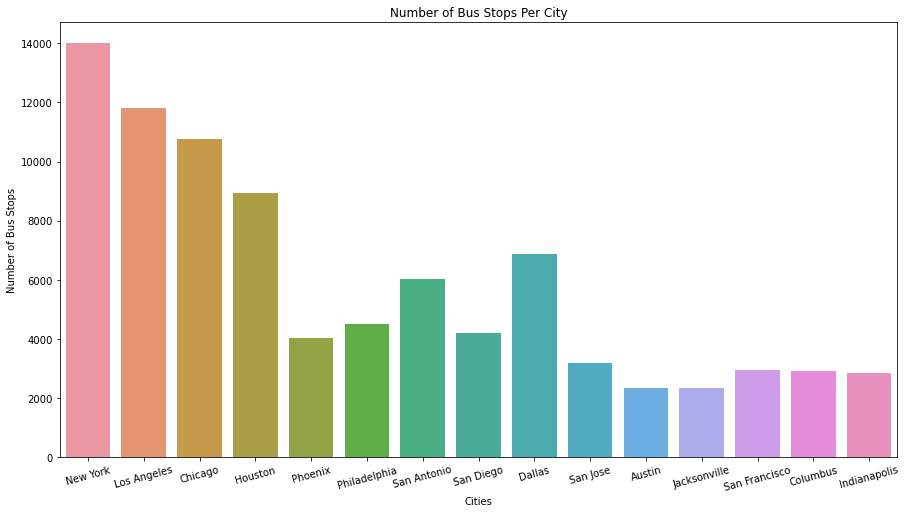

In [88]:
f2,ax = plt.subplots(figsize =(15, 8))
sns.barplot(data=pop_stops2.reset_index(),x = 'City', y= 'Number of Bus Stops', ax=ax)
plt.xticks(rotation=15)
plt.title('Number of Bus Stops Per City')
plt.xlabel('Cities')
plt.ylabel('Number of Bus Stops')

In [89]:
pop_stops2['Land Area (sq. mi)'] = [303,469,228,600,517,134,461,325,341,177,298,747,47,217,361]
pop_stops2['Stops/Square Mile'] = pop_stops2['Number of Bus Stops']/ pop_stops2['Land Area (sq. mi)']
pop_stops2

,Population Density (Persons/Square Mile),Population,Number of Bus Stops,Land Area (sq. mi),Stops/Square Mile
City,,,,,
New York,28211,8537673,14000,303,46.204620
Los Angeles,8484,3976322,11824,469,25.211087
Chicago,11883,2704958,10768,228,47.228070
Houston,38422,2303482,8939,600,14.898333
Phoenix,3126,1615017,4038,517,7.810445
Philadelphia,11692,1567872,4512,134,33.671642
San Antonio,3238,1492510,6015,461,13.047722
San Diego,4326,1406630,4191,325,12.895385
Dallas,3870,1317929,6878,341,20.170088


In [90]:
pop_stops3 = pop_stops2.sort_values(by='Stops/Square Mile', ascending = False)

Text(0, 0.5, 'Number of Stops/Square Mile')

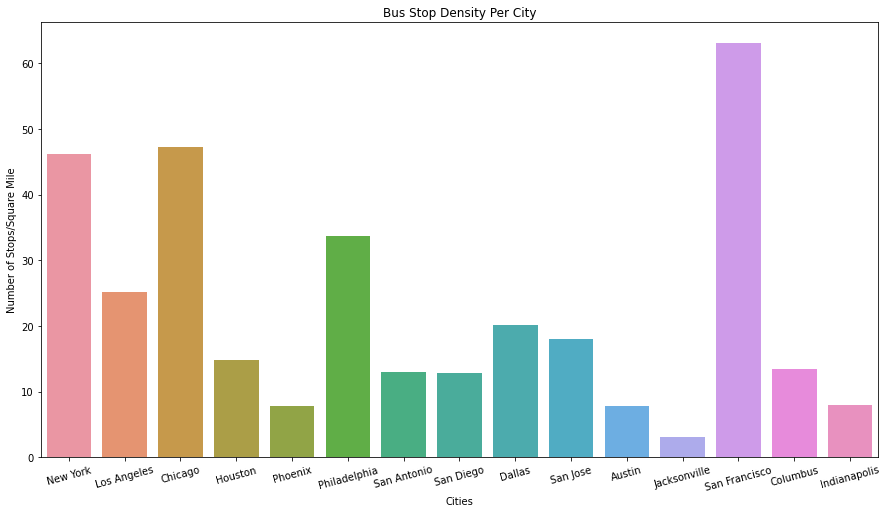

In [91]:
f3,ax = plt.subplots(figsize =(15, 8))
sns.barplot(data=pop_stops2.reset_index(),x='City', y='Stops/Square Mile', ax=ax)
plt.xticks(rotation=15)
plt.title('Bus Stop Density Per City')
plt.xlabel('Cities')
plt.ylabel('Number of Stops/Square Mile')

In [92]:
pop_stops2['Accident Count'] = accidents_byCity.values()
pop_stops2

,Population Density (Persons/Square Mile),Population,Number of Bus Stops,Land Area (sq. mi),Stops/Square Mile,Accident Count
City,,,,,,
New York,28211,8537673,14000,303,46.204620,5438
Los Angeles,8484,3976322,11824,469,25.211087,58092
Chicago,11883,2704958,10768,228,47.228070,5067
Houston,38422,2303482,8939,600,14.898333,29279
Phoenix,3126,1615017,4038,517,7.810445,13287
Philadelphia,11692,1567872,4512,134,33.671642,6453
San Antonio,3238,1492510,6015,461,13.047722,5482
San Diego,4326,1406630,4191,325,12.895385,22462
Dallas,3870,1317929,6878,341,20.170088,34040


In [93]:
pop_stops2['Accidents/Square Mile'] = pop_stops2['Accident Count'] / pop_stops2['Land Area (sq. mi)']
pop_stops2

,Population Density (Persons/Square Mile),Population,Number of Bus Stops,Land Area (sq. mi),Stops/Square Mile,Accident Count,Accidents/Square Mile
City,,,,,,,
New York,28211,8537673,14000,303,46.204620,5438,17.947195
Los Angeles,8484,3976322,11824,469,25.211087,58092,123.863539
Chicago,11883,2704958,10768,228,47.228070,5067,22.223684
Houston,38422,2303482,8939,600,14.898333,29279,48.798333
Phoenix,3126,1615017,4038,517,7.810445,13287,25.700193
Philadelphia,11692,1567872,4512,134,33.671642,6453,48.156716
San Antonio,3238,1492510,6015,461,13.047722,5482,11.891540
San Diego,4326,1406630,4191,325,12.895385,22462,69.113846
Dallas,3870,1317929,6878,341,20.170088,34040,99.824047


# Data Analysis & Results

To answer our question, we need to see how many accidents occur in each of the cities we narrowed down to. We also compared the counts of bus stops per city to find any correlation. 

**Bar Plot 1: Number of Accidents + Bus Stops Per City**

Text(0.5, 1.0, 'Accident and Bus Stop Count Per City')

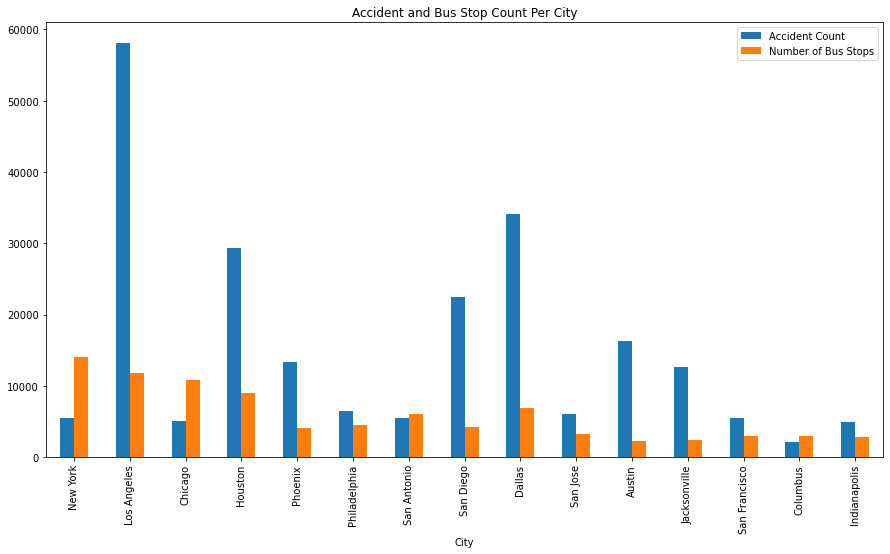

In [94]:
f4,ax = plt.subplots(figsize =(15, 8))
pop_stops2 = pop_stops2.reset_index()
pop_stops2.plot(x='City', y=['Accident Count', 'Number of Bus Stops'], kind='bar', ax=ax)
plt.title('Accident and Bus Stop Count Per City')

This bar plot represents the counts for how many traffic accidents happened in a city in relation to the number of bus stops in those cities. We felt that we needed to visualize the amount of accidents that have been recorded for each city and see if the amount of bus stops in the city significantly decrease the amount of accidents in each city. As seen in this bar plot however we can see that the amount of bus stops in each city does not significantly affect how many accidents occurred per city. As we can see for example, San Diego and San Antonio have the same amount of bus stops but a significant difference in the amount of car accidents. However, we feel that this does not accurately represent the correlation we are questioning therefore we are going to model further variables to understand the relationship better.

**Bar Plot 2: Accident + Bus Stop Density Per City**

Text(0.5, 1.0, 'Accidents and Bus Stop Density Per City')

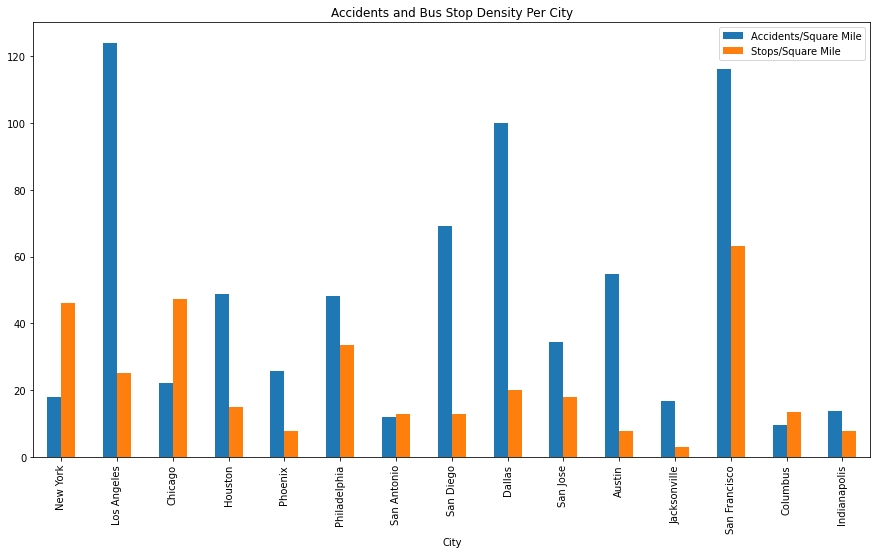

In [95]:
f5,ax = plt.subplots(figsize =(15, 8))
pop_stops2 = pop_stops2.reset_index()
pop_stops2.plot(x='City', y=['Accidents/Square Mile', 'Stops/Square Mile'], kind='bar', ax=ax)
plt.title('Accidents and Bus Stop Density Per City')

We felt that just comparing accidents to the amount of bus stops in a city did not give us enough evidence to base any decisions. We started our further analysis by visualizing the relationship between bus stop density and accident count, which are our independent and dependent variables, respectively. This bar plot highlights the information in regards to density, in this case recorded in square miles. The reason why we chose bus stop density in comparison to the overall count this time is because we wanted to see if the main relation was based on the sparsity of the bus stops throughout each city. Narrowing down to the level of square miles helps us see if the accidents were focused in certain areas and how the locations of the bus stops could influence the positioning. 

**Scatter Plot 1: Bus Stop Density/Accident Count**

Text(4.925000000000011, 0.5, 'Accident Count')

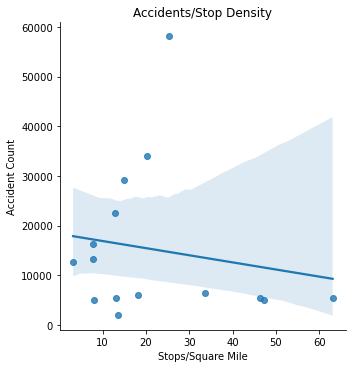

In [96]:
sns.lmplot(data=pop_stops2.reset_index(),x='Stops/Square Mile', y='Accident Count')
plt.title('Accidents/Stop Density')
plt.xlabel('Stops/Square Mile')
plt.ylabel('Accident Count')

Taking it one step further, this linear plot, where accident count in a city is shown on the y-axis and the number of bus stops per square mile on the x-axis, displays a negative correlation: the higher the density of bus stops (in stops per square mile) in a city, the lower the number of accidents. This plot goes in line with what we expected in that a higher concentration of bus stops would mean a lower number of accidents. If the density of bus stops is higher it means that the public transportation system is more accessible to the citizens, yielding a decrease in individual drivers and rate of collisions.

<h3>Linear Regression</h3>
Below, we used a linear regression model to determine the exact statistics regarding the correlation between bus stop density and accident count, and the correlation between population density and accident count. These models were created to determine whether the correlation seen in the plots occurred by chance or by actual causation. 

In [97]:
Y=pop_stops2['Accident Count']
X=pop_stops2['Stops/Square Mile']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Accident Count   R-squared (uncentered):                   0.250
Model:                            OLS   Adj. R-squared (uncentered):              0.197
Method:                 Least Squares   F-statistic:                              4.669
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                      0.0485
Time:                        17:43:55   Log-Likelihood:                         -168.53
No. Observations:                  15   AIC:                                      339.1
Df Residuals:                      14   BIC:                                      339.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

c:\Users\sasha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


There is a significant effect size of 377.7, and the p-value is very small (0.049), which means the probability of the correlation occurring by chance is very small. The linear model shows that there is a significant relationship between bus stop density and accident count.

<h3>Looking Into Confounding Variables</h3>
When looking at the large accident data set encompassing the United States, it is important to realize that there are many factors that could play a role in the likelihood of an accident occurring. Strictly analyzing the bus stop density and comparing it to accidents is not enough, and looks over potential other significant factors that could be influencing the statistics.

#### Confounding Factor #1: Population Density

First, we consider population density a confounding variable because a more dense area would likely have more traffic, potentially leading to more traffic accidents within the denser regions.

**Scatter Plot 2: Population Density/Accident Count**

Text(-3.4499999999999886, 0.5, 'Accident Count')

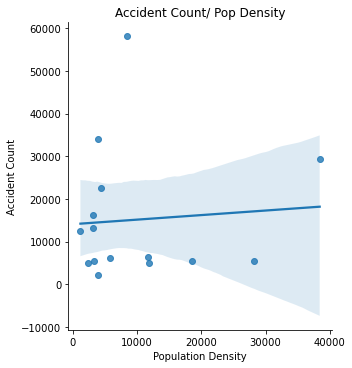

In [98]:
sns.lmplot(data=pop_stops2.reset_index(),x='Population Density (Persons/Square Mile)', y='Accident Count')
plt.title('Accident Count/ Pop Density')
plt.xlabel('Population Density')
plt.ylabel('Accident Count')

Once again, we utilize a linear plot to compare the population per square mile and number of accidents. The scatter plot shows a slightly positive correlation between the population density shown on the x-axis and the accident counts found on the y-axis. As we had predicted, there does seem to be a positive correlation between population density and frequency of accidents. If the population density is higher, meaning more people per square mile, there is a corresponding increase in collisions. However, the linear plot itself doesn’t show as significant of a correlation as originally expected. We had thought that the population density would have been a large alternative factor to bus stop concentration for accidents in major cities.

**Linear Regression Model 2: Population Density/Accident Count**

In [99]:
Y=pop_stops2['Accident Count']
X=pop_stops2['Population Density (Persons/Square Mile)']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Accident Count   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.231
Method:                 Least Squares   F-statistic:                              5.498
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                      0.0343
Time:                        17:43:55   Log-Likelihood:                         -168.20
No. Observations:                  15   AIC:                                      338.4
Df Residuals:                      14   BIC:                                      339.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------

c:\Users\sasha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


There is a significant effect size of 0.78, and the p-value is very small (0.034), which means the probability of the correlation occurring by chance is very small. This linear model shows that there is a significant relationship between population density and accident count and proves that population density is a valid confound in our analysis of the effect of bus stop density on accident frequency. Our interpretation of this result is that because a greater population density could mean more concentrated traffic on the roads, there may be more car accidents in cities with greater population densities.

#### Confounding Factor #2: Weather Conditions

Weather was another major confounding factor we wanted to consider, but is too general, so we specifically looked into the influence of temperature and precipitation on accidents within respective regions. The US Accidents dataset from Kaggle included records of temperature in fahrenheit and precipitation in inches which we predicted would impact the likelihood of the occurrence of collisions.

In [100]:
file['Weather_Condition'].value_counts()

Fair                      108082
Mostly Cloudy              33326
Cloudy                     32714
Partly Cloudy              21372
Light Rain                 10696
                           ...  
Snow and Sleet / Windy         1
Thunder / Wintry Mix           1
Freezing Rain / Windy          1
Heavy Sleet                    1
Sand / Dust Whirlwinds         1
Name: Weather_Condition, Length: 73, dtype: int64

In [101]:
file_temps = pd.DataFrame(file.groupby('City')['Temperature(F)'].mean()).reset_index()
pop_stops2['Temperature(F)'] = file_temps['Temperature(F)']
pop_stops2 = pop_stops2.drop('index', axis =1 )
pop_stops2

,City,Population Density (Persons/Square Mile),Population,Number of Bus Stops,Land Area (sq. mi),Stops/Square Mile,Accident Count,Accidents/Square Mile,Temperature(F)
0,New York,28211,8537673,14000,303,46.204620,5438,17.947195,70.777201
1,Los Angeles,8484,3976322,11824,469,25.211087,58092,123.863539,53.934221
2,Chicago,11883,2704958,10768,228,47.228070,5067,22.223684,54.869870
3,Houston,38422,2303482,8939,600,14.898333,29279,48.798333,67.432350
4,Phoenix,3126,1615017,4038,517,7.810445,13287,25.700193,72.420120
5,Philadelphia,11692,1567872,4512,134,33.671642,6453,48.156716,55.802610
6,San Antonio,3238,1492510,6015,461,13.047722,5482,11.891540,70.097729
7,San Diego,4326,1406630,4191,325,12.895385,22462,69.113846,64.725232
8,Dallas,3870,1317929,6878,341,20.170088,34040,99.824047,56.923575
9,San Jose,5808,1025350,3201,177,18.084746,6119,34.570621,55.192686


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'New York'),
  Text(1, 0, 'Los Angeles'),
  Text(2, 0, 'Chicago'),
  Text(3, 0, 'Houston'),
  Text(4, 0, 'Phoenix'),
  Text(5, 0, 'Philadelphia'),
  Text(6, 0, 'San Antonio'),
  Text(7, 0, 'San Diego'),
  Text(8, 0, 'Dallas'),
  Text(9, 0, 'San Jose'),
  Text(10, 0, 'Austin'),
  Text(11, 0, 'Jacksonville'),
  Text(12, 0, 'San Francisco'),
  Text(13, 0, 'Columbus'),
  Text(14, 0, 'Indianapolis')])

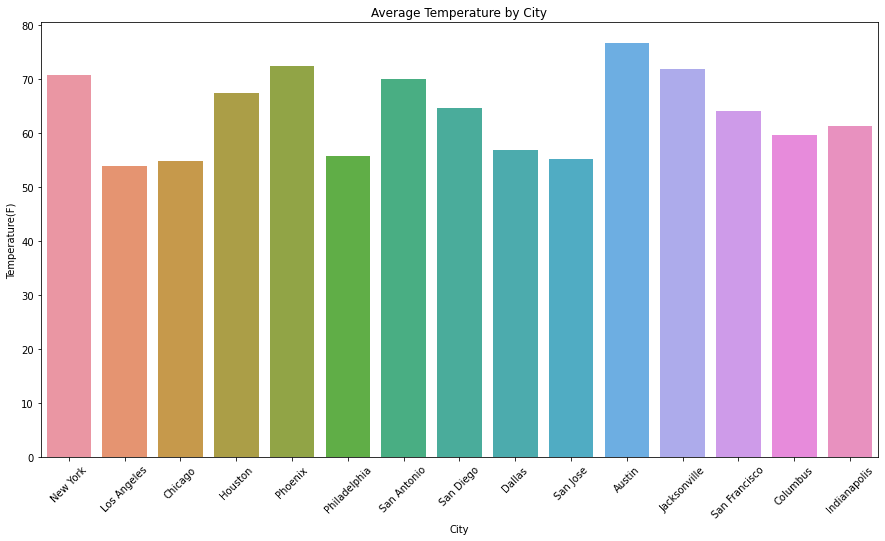

In [102]:
f6,ax = plt.subplots(figsize =(15, 8))
sns.barplot(data=pop_stops2, x= 'City', y = 'Temperature(F)', ax=ax)
plt.title('Average Temperature by City')
plt.xticks(rotation=45)

In [103]:
temps = file.groupby('City').mean()
temps.shape

(15, 12)

**Scatter Plot 3: Temperature**

Text(0, 0.5, 'Accident Density')

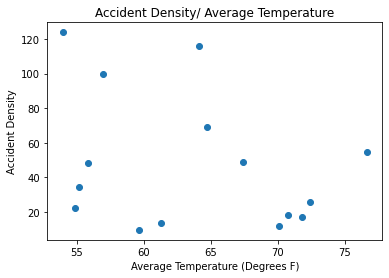

In [104]:
plt.scatter(x=temps['Temperature(F)'], y=pop_stops2['Accidents/Square Mile'])
plt.title('Accident Density/ Average Temperature')
plt.xlabel('Average Temperature (Degrees F)')
plt.ylabel('Accident Density')

The above plot depicts the relationship between temperature and concentration of accidents. The data points are scattered quite randomly so it is difficult to draw a relationship between these factors. It was important to consider the temperature since we were analyzing cities spreading across the country in different climate zones, which could have some effect on accidents. This makes sense however, since we would consider precipitation, amongst other weather factors, to be more influential in impacting accident likelihood. 


In [105]:
precipitation = file.groupby('City').mean()
precipitation

,Unnamed: 0,Temperature(F),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,Railway,Roundabout,Station,Stop
City,,,,,,,,,,,,
Austin,1.245623e+06,70.777201,0.004066,0.056722,0.001473,0.111234,0.004113,0.032781,0.002701,0.000368,0.050215,0.007735
Chicago,2.129628e+06,53.934221,0.013138,0.032564,0.000000,0.089797,0.000000,0.232090,0.085652,0.000000,0.196566,0.024077
Columbus,1.745516e+06,54.869870,0.020299,0.014003,0.000000,0.061806,0.000000,0.123129,0.000483,0.000000,0.044906,0.008209
Dallas,1.261650e+06,67.432350,0.006077,0.009136,0.000382,0.102967,0.000235,0.089307,0.009313,0.000000,0.002350,0.003878
Houston,1.276591e+06,72.420120,0.007738,0.013867,0.000581,0.066088,0.013423,0.049933,0.010724,0.000000,0.005601,0.100857
Indianapolis,1.427292e+06,55.802610,0.010713,0.000803,0.000000,0.027906,0.002409,0.151777,0.001606,0.000000,0.002811,0.001004
Jacksonville,1.362293e+06,70.097729,0.014678,0.002382,0.000238,0.059641,0.000556,0.157322,0.002621,0.000000,0.000874,0.000953
Los Angeles,1.528841e+06,64.725232,0.003835,0.015303,0.000258,0.056565,0.000155,0.114336,0.018350,0.000069,0.044326,0.022568
New York,1.366461e+06,56.923575,0.052624,0.106289,0.000919,0.156307,0.000368,0.216256,0.022067,0.000000,0.045421,0.020044


**Scatter Plot 4: Precipitation/Accident Density**

In [106]:
file_precip = pd.DataFrame(file.groupby('City')['Precipitation(in)'].mean()).reset_index()
pop_stops2['Precipitation(in)'] = file_precip['Precipitation(in)']

Text(15.675000000000011, 0.5, 'Accidents/Square Mile')

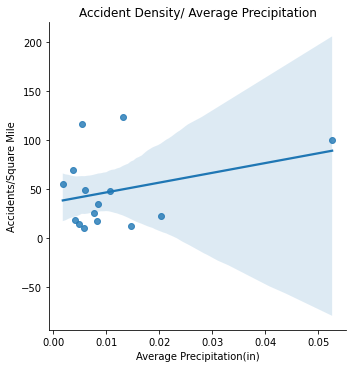

In [107]:
sns.lmplot(data = pop_stops2,x='Precipitation(in)', y='Accidents/Square Mile')
plt.title('Accident Density/ Average Precipitation')
plt.xlabel('Average Precipitation(in)')
plt.ylabel('Accidents/Square Mile')

The above plot depicts the relationship between precipitation and concentration of accidents. These data points are still relatively scattered and sparse, making it difficult to draw solid conclusions from the plot. However, it does somewhat show a general positive trend if we don’t take some of the outliers into consideration. This also makes sense since slippery roads are more difficult to drive on, leading to more collisions.

**Note:** It is possible that the weather could play a more influential role than it may seem thus far as a confounding variable. In the original dataset, there exists a Weather_Condition variable that records inputs like “Light Rain,” and “Heavy Snow” which we could categorize further and find proper correlation. Compared to temperature and precipitation, we believe that we will find more significant relationships between harsher categorized weather conditions and accidents in major cities.

**Linear Regression Model 3: Accident Density/Average Precipitation**

In [108]:
Y=pop_stops2['Accidents/Square Mile']
X=pop_stops2['Precipitation(in)']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Accidents/Square Mile   R-squared (uncentered):                   0.466
Model:                               OLS   Adj. R-squared (uncentered):              0.428
Method:                    Least Squares   F-statistic:                              12.21
Date:                   Thu, 08 Dec 2022   Prob (F-statistic):                     0.00358
Time:                           17:43:57   Log-Likelihood:                         -78.085
No. Observations:                     15   AIC:                                      158.2
Df Residuals:                         14   BIC:                                      158.9
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----

c:\Users\sasha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Though the standard error is large (718.2), it is small relative to the effect size (2509.1). The p-value is very small (0.004), which means the probability of the correlation occurring by chance is very small. This linear model shows that there is a significant relationship between average precipitation and accident density and proves that precipitation is a valid confound in our analysis of the effect of bus stop density on accident frequency. Our interpretation of this result is that more precipitation causes more hazardous driving conditions, so the accident density is higher in cities with greater average precipitation. 

**Scatter Plot 5: Precipitation/Accident Count**

(0.0, 0.07)

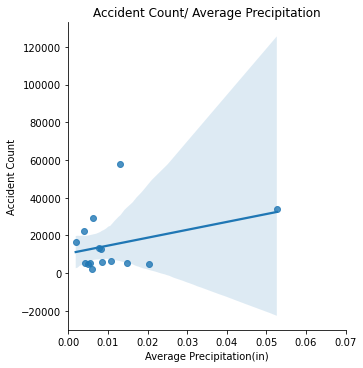

In [109]:
sns.lmplot(data = pop_stops2,x='Precipitation(in)', y='Accident Count')
plt.title('Accident Count/ Average Precipitation')
plt.xlabel('Average Precipitation(in)')
plt.ylabel('Accident Count')
plt.xlim(0, 0.07)

In this line plot, we look at the relationship between precipitation and our original dependent variable of accident count rather than accident density. Similar to our plot using accident density, our data points are scattered, but there is a general positive correlation.

**Linear Regression Model 4: Accident Count/Average Precipitation**

In [110]:
Y=pop_stops2['Accident Count']
X=pop_stops2['Precipitation(in)']
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:         Accident Count   R-squared (uncentered):                   0.438
Model:                            OLS   Adj. R-squared (uncentered):              0.397
Method:                 Least Squares   F-statistic:                              10.89
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                     0.00526
Time:                        17:43:57   Log-Likelihood:                         -166.37
No. Observations:                  15   AIC:                                      334.7
Df Residuals:                      14   BIC:                                      335.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

c:\Users\sasha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The standard error seems very large (2.58e5), it is valid relative to the effect size (8.528e5). The p-value is very small (0.005), which means the probability of the correlation occurring by chance is very small. This linear model shows that there is a significant relationship between average precipitation and accident count and proves that precipitation is a valid confounding factor. Our real-world interpretation of this result is that more precipitation creates a more hazardous driving setting, so the accident concentration would be higher in cities with more precipitation. 

#### Confounding Factor #3: Proximity to Infrastructure

Another confounding factor that we thought may affect the number of accidents throughout the 15 major cities was looking into if the accident that occurred was in close proximity (tenth of a mile) to one of the following three infrastructures; Crossing, Junction, or a Stop Sign. These infrastructures tend to be locations where vehicles must change directions or change speed quickly compared to other locations so there could be a higher rate of accidents. In the U.S. accidents dataset that we pulled, each accident also had data determining “True” or “False” whether the accident was in close relation to one of these infrastructures. We predict that there may not be that significant of an influence on the number of accidents in relation to their close proximity to one of the three infrastructures. This is especially due to the greater impact that the other variables we considered would make.

**Triple Bar Plot 3: Proximity to Infrastructure (Crossing, Junction, Stop)**

Text(0.5, 0, 'City')

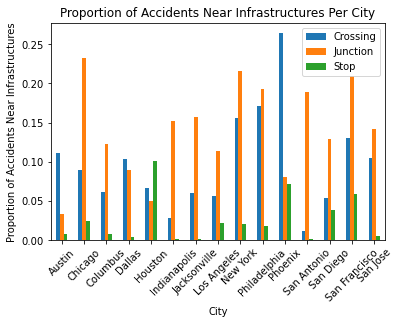

In [111]:
f = pd.DataFrame(file.groupby('City').mean())
f[['Crossing', 'Junction', 'Stop']].plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Proportion of Accidents Near Infrastructures')
plt.title('Proportion of Accidents Near Infrastructures Per City')
plt.xlabel('City')

The above plot represents every city's number of accidents if they were close to one of the three infrastructures, divided by the total number of accidents that occurred in the city. In the bar plot we notice that most of the accidents ratios are all lower then 25% therefore letting us infer that many accidents did not occur close to any single one of the infrastructures. Therefore this lines up with our initial assumption that these infrastructures cannot be a strong identifier for the amount of accidents that occur. However in relation to every single city itself we did notice that there was a significantly higher ratio of accidents that were close to Junctions in relation to any other infrastructure. It was interesting to find that there was an outlier in Phoenix where there was a drastic increase in accidents that occurred close to crossings.

# Ethics & Privacy

The proposed question involves a comparison between the number of bus stops within a city and the frequency of car crashes involved within their respective areas. The possible ethical shortcomings can be found in the confounding variables and factors that can ultimately skew data in different cities based on exterior factors not involving the main variables and observations being measured. The public transport system is a resource funded by grants, state and local governments, and collected revenues, where more impoverished areas could have less access or may remain unaffordable to residents. Given this information, the stated hypothesis and data collection necessary to make any conclusions about this matter faces no ethical turbulence. Any data gathered is accessed from public websites with no bias and no privacy issues, considering this is a dataset addressing large areas with no personal information involved. This project aims to be as equitable as possible when gathering data before forming any sort of analysis, taking into account the possible population bias, differing landscapes, and population density variance of dissimilar cities being compared.

# Conclusion & Discussion

In this data science project, we aimed to assess the relationship between the use of public transportation (bus stops) and car accidents in metropolitan cities in the United States. Not only did we assess the impact of bus stops, but we also took into consideration other factors relating to accident likelihood including weather conditions, population density, and proximity to infrastructure. Prior to conducting our research, we hypothesized that with an increase of accessibility and use of the bus system (i.e. more bus stops), there would be a decrease in the rate of the collisions in the area for metropolitan cities. The logic behind this is that there will be less individuals driving, leading to less cars on the road, and without as much congestion, the streets would be overall safer. As a result, we hypothesized that the relationship between accident count and bus stop frequency was inversely proportional. By assessing the impact of public transportation, more specifically bus stops, we hoped to highlight a potential relationship between the factors of influence on accident concentrations in metropolitan cities.

Simply plotting the counts of accidents and bus stops per city did not give us as clear of a relationship as we had originally hypothesized. Therefore, we had to look into other analytical methods to draw statistically significant comparisons. Based on our data gathered from performing a linear regression on the relationship between bus stop density and accident count, we conclude that an increase in bus stop density causes a decrease in the number of accidents within a major US city. The indicated p-value means that we should reject the null hypothesis, given that the results are technically statistically significant. The R2 value produced is reflective of our data’s reliance on human interaction, given that human-based studies are less predictable. The simple social and cultural differences between cities, such as Houston and Los Angeles, and other confounding variables in our gathered data hinders this predictability we can gather from reading our R2 value since they could also play significant roles with car collision likelihood, limiting what we can conclude from it. From this, we can say our hypothesis was relatively conclusive when analyzing this relationship between accident count and bus stop density, but the analysis didn’t produce very statistically significant output. The general indication was that cities with a higher bus stop density tended to have a proportionally lower accident concentration.

Since we weren’t necessarily able to derive a concrete relationship strictly off of the bus stop frequencies, we looked into alternative factors of influence. Before we even began our analysis, we knew that population density could be one of the more influential outside variables since more people in an area means more congestion, leading to more traffic and accidents. Running a linear regression model on it showed significant relationship between population density and accident count with a small p-value and significant effect size. We can confirm that we had the correct assumption as a greater population density means more concentrated traffic on the roads, leading to more accidents. The second confounding factor we considered was proximity to infrastructure, which we did not believe to have too strong of an influence, but could still be valuable to include. After plotting the proportions of accidents that occurred near infrastructure, we saw that for every city, the proportion was less than 25%, aligning with out original assumption. The last confounding factor we considered was weather, particularly precipitation, which we hypothesized to be significantly influential to accident rates. Despite the constraint of a low sample size (15 cities), the linear regression for precipitation yielded the strongest correlation with a considerably small p-value of 0.004 and the highest level of predictability from the R2 value, 46.5%. This makes sense since we are dealing with human-dependent data points and precipitation is known to be highly influential when it comes to accident rates. 

Overall, our work has progressed our understanding of how a data science project can be completed from start to finish. It was very interesting to research the association between bus stop concentrations and accident likelihood, while taking into consideration additional confounding factors like weather, population density, and proximity to infrastructure. As society continues to develop, inquiries like this are necessary to find unique correlations that affect day to day lives and create educated, innovative responses. We know that our findings may have some limitations, but are hopeful that we were able to produce some distinctive insights.
 
**Data Limitations**

Looking back at the project, we realized that we were significantly limiting the accuracy of our models and statistical outputs with the small sample size used. We thought that the sheer number of points in the US Accidents data set would provide more concrete statistical outputs. Finding an accurate number of bus stops per city proved to be quite difficult, which is why we settled on only analyzing the major metropolitan cities. Even then, it would have been better to include a larger sample of cities to accommodate further. Considering that our dataset was a human-based study, it would have been beneficial to incorporate more data to account for the unpredictability of humans.


# Team Contributions

- Alexander Kourjanski: Data Cleaning, EDA, Statistical Analysis, Github, Confounding Factors, Video
- Nadine Marcus: Webscrape, EDA, Plot Generation, Statistical Analysis, Confounding Factors, Video
- Sean Bianes: Background, Data Cleaning, EDA, Inferential Analysis, Ethics & Privacy,Video
- Seung Kang: Background, EDA, Linear Regression Analysis, Ethics & Privacy, Video
- Shasta Subramanian: Data Cleaning, EDA, Inferential Analysis, Confounding Factors, Github, Video
